### Домашнее задание Семинар 9. Инструменты разметки данных.

Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. 
Датасет должен содержать неструктурированные данные, требующие разметки для решения 
конкретной задачи, например, анализа настроений или распознавания именованных сущностей.



In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wine_data = pd.read_csv('wine.csv')

Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. 
Разработайте и реализуйте набор правил или условий, которые позволят автоматически 
присваивать метки данным на основе определенных шаблонов или критериев. 



In [3]:
# Функция для определения настроения текста
def sentiment_analysis(text):
    positive_keywords = ['good', 'great', 'excellent', 'positive', 'happy', 'well', 'wonderful', 'enjoy', 'gorgeous']
    negative_keywords = ['bad', 'terrible', 'disappointed', 'negative', 'upset', 'worst']
    
    if not isinstance(text, str):  # Проверяем, что text является строкой
        return 'neutral'  # Возвращаем 'neutral' для нестроковых значений
    
    text = text.lower()  # Приведение текста к нижнему регистру для упрощения сравнения
    if any(keyword in text for keyword in positive_keywords):
        return 'positive'
    elif any(keyword in text for keyword in negative_keywords):
        return 'negative'
    else:
        return 'neutral'

# Загрузка данных
wine_data = pd.read_csv('wine.csv')

# Преобразуем все значения в столбце 'review' в строки, заменяя NaN на пустые строки
wine_data['review'] = wine_data['review'].astype(str)

# Применяем функцию к столбцу с отзывами
wine_data['Sentiment'] = wine_data['review'].apply(sentiment_analysis)

# Сохраняем обновленный DataFrame в новый CSV-файл
wine_data.to_csv('new_wine.csv', index=False, encoding='utf-8')

Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью 
выбранного вами инструмента разметки.



In [4]:
# Выборка подмножества данных
subset = wine_data.sample(n=100)  # Например, случайный выбор 100 записей
subset.to_csv('subset.csv', index=False, encoding='utf-8')

Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. 
Объедините два подмножества размеченных данных в один набор данных, сохранив при этом 
соответствующую структуру и целостность.



In [5]:
# Ручная разметка уже выполнена и результаты в файле 
manually_labeled_data = pd.read_csv("project-20-at-2024-08-02-19-27-c0c95eb3.csv")
new_wine_data = pd.read_csv('new_wine.csv')
# Объединяем автоматически размеченные данные с ручной разметкой
combined_data = pd.concat([new_wine_data, manually_labeled_data])
combined_data['Sentiment'].fillna('neutral', inplace=True)
print(combined_data['review'].isna().sum())
combined_data = combined_data.dropna(subset=['review'])
combined_data.loc[:, 'review'] = combined_data['review'].fillna('')

1130


Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. 
Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения 
модели.



In [6]:
print(combined_data['review'].isna().sum())
combined_data = combined_data.dropna(subset=['review'])
combined_data.loc[:, 'review'] = combined_data['review'].fillna('')


0


In [7]:
# Подготовка данных для обучения
x = combined_data['review']
y = combined_data['Sentiment']

# Векторизация текста
vectorizer = TfidfVectorizer()
x_vectorized = vectorizer.fit_transform(x)

# Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.2, random_state=42)

# Создание и обучение модели логистической регрессии
model = LogisticRegression()
model.fit(x_train, y_train)





LogisticRegression()

Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие 
метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в 
решении задачи разметки

In [8]:
# Прогнозирование меток для тестовых данных
y_test_predicted = model.predict(x_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_test_predicted)
print(f'Точность модели: {accuracy}')

Точность модели: 0.9964929704230161


In [14]:
from sklearn.linear_model import LogisticRegression

# Создание и обучение модели линейной регрессии с разреженными матрицами
linear_model = LinearRegression()

# Преобразование меток в числовые значения для линейной регрессии
y_train_numeric = y_train.map({'positive': 1, 'neutral': 0, 'negative': -1})
y_test_numeric = y_test.map({'positive': 1, 'neutral': 0, 'negative': -1})

# Обучение модели линейной регрессии
linear_model.fit(x_train, y_train_numeric)

# Предсказание значений для тестовой выборки
y_test_predicted_linear = linear_model.predict(x_test)

# Оценка качества модели линейной регрессии
mse = mean_squared_error(y_test_numeric, y_test_predicted_linear)
r2 = r2_score(y_test_numeric, y_test_predicted_linear)

print(f'Среднеквадратическая ошибка (MSE): {mse}')
print(f'Коэффициент детерминации (R^2): {r2}')

Среднеквадратическая ошибка (MSE): 0.040390923976087525
Коэффициент детерминации (R^2): 0.7884093228065374


In [15]:
from sklearn.cluster import KMeans

# Создание и обучение модели K-means
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(x_vectorized)

KMeans(n_clusters=3, random_state=42)

In [16]:
# Получение меток кластеров
cluster_labels = kmeans.labels_

# Добавляем метки кластеров к исходным данным
combined_data['Cluster'] = pd.Series(cluster_labels, index=combined_data.index)

# Для визуализации преобразуем данные в двумерное пространство с помощью PCA
pca = PCA(n_components=2)

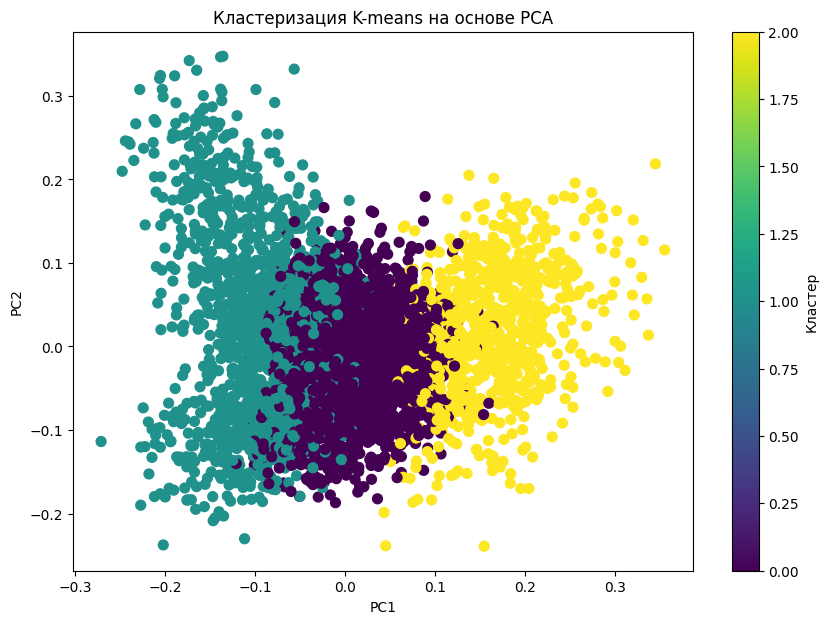

In [17]:
# Используем случайное подмножество для PCA, если данные слишком велики
sample_size = min(5000, x_vectorized.shape[0])
x_pca = pca.fit_transform(x_vectorized[:sample_size].toarray())

# Визуализация кластеров
plt.figure(figsize=(10, 7))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=combined_data['Cluster'][:sample_size], cmap='viridis', s=50)
plt.title('Кластеризация K-means на основе PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Кластер')
plt.show()